# Analysis of granural PAS data set

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
# download the data

data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
data_19_20 = pd.read_csv(".\data\PAS_ward_level_FY_19_20.csv")
data_20_21 = pd.read_csv(".\data\PAS_ward_level_FY_20_21.csv")


C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2865077880.py:3: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2865077880.py:4: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2865077880.py:5: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2865077880.py:6: DtypeWa

# Working on spliting the years (creating the datetime object)

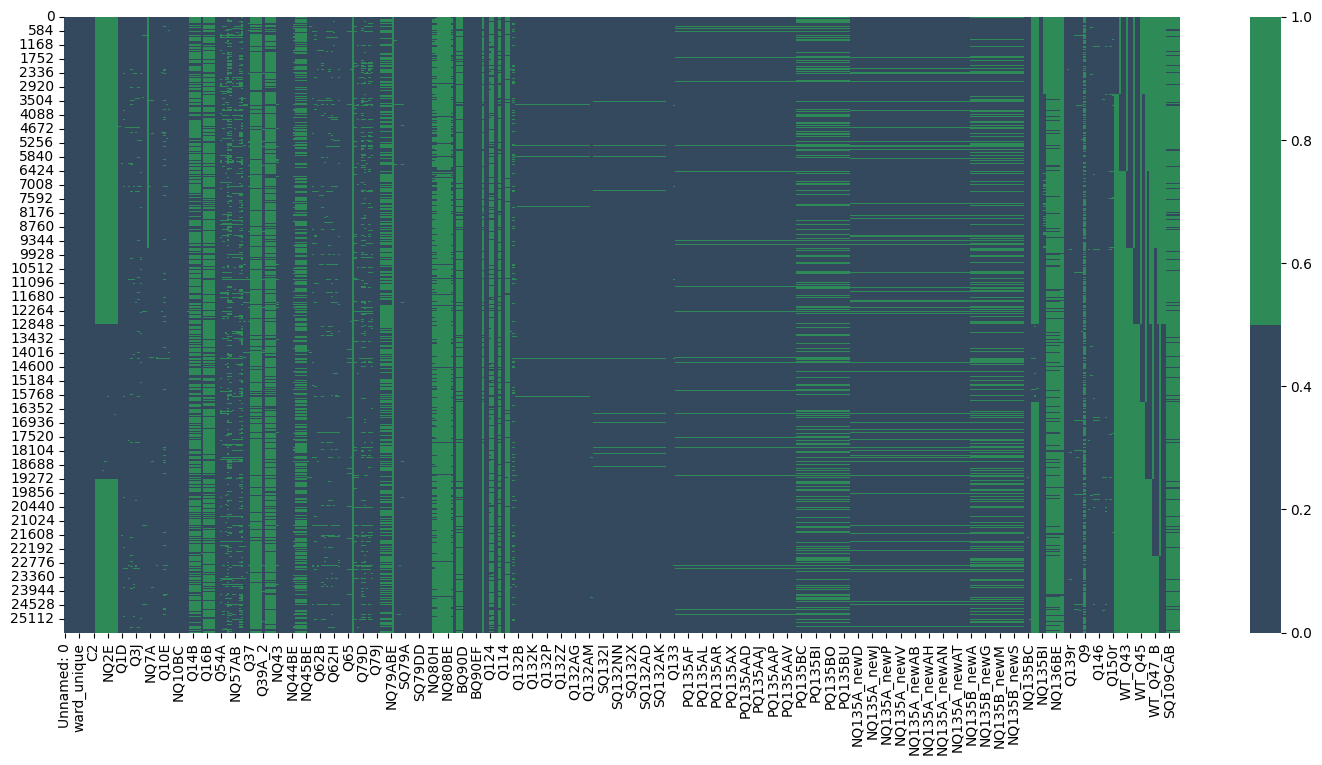

In [3]:
### Missing values
def plot_NAN(data):
    plt.figure(figsize=(18,8))

    colours = ['#34495E', 'seagreen'] 
    sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

plot_NAN(data_15_17)

In [209]:
data_15_17["MONTH"].unique()

array(['49 (Apr 2015)', '50 (May 2015)', '51 (Jun 2015)', '52 (Jul 2015)',
       '53 (Aug 2015)', '54 (Sep 2015)', '56 (Nov 2015)', '57 (Dec 2015)',
       '55 (Oct 2015)', '58 (Jan 2016)', '59 (Feb 2016)', '60 (Mar 2016)',
       '61 (Apr 2016)', '62 (May 2016)', '63 (Jun 2016)', '64 (Jul 2016)',
       '65 (Aug 2016)', '66 (Sep 2016)', '67 (Oct 2016)', '68 (Nov 2016)',
       '69 (Dec 2016)', '70 (Jan 2017)', '71 (Feb 2016)', '72 (Mar 2016)'],
      dtype=object)

In [5]:
### Functions to create datetime for entire data set

def month_transformation(month):
    month_info = {
        'Jan': 1,
        'Feb': 2, # For leap years, February has 29 days
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }
    return  month_info[month]

def data_creation(row, col):
    month = row[col].split()[1][1:]
    year = row[col].split()[2][:-1]
    date_str = f'01/{month_transformation(month)}/{year}' # day of an interview unvailable -> always equal to 01
    date = pd.to_datetime(date_str,  format='%d/%m/%Y')
    return date


data_15_17["datetime"] = data_15_17.apply(data_creation, axis=1, args=("MONTH", ))
data_17_18["datetime"] = data_17_18.apply(data_creation, axis=1, args=("MONTH", ))
data_18_19["datetime"] = data_18_19.apply(data_creation, axis=1, args=("MONTH", ))
data_19_20["datetime"] = data_19_20.apply(data_creation, axis=1, args=("MONTH", ))
data_20_21["datetime"] = data_20_21.apply(data_creation, axis=1, args=("MONTH", ))


In [6]:
data_15 = data_15_17[data_15_17["datetime"].dt.year == 2015]
data_16 = data_15_17[data_15_17["datetime"].dt.year == 2016]
data_17 = data_15_17[data_15_17["datetime"].dt.year == 2017]

In [7]:
data_17_1 = data_17_18[data_17_18["datetime"].dt.year == 2017]
data_18 = data_17_18[data_17_18["datetime"].dt.year == 2018]

In [8]:
data_18_1 = data_18_19[data_18_19["datetime"].dt.year == 2018]
data_19 = data_18_19[data_18_19["datetime"].dt.year == 2019]

In [9]:
data_19_1 = data_19_20[data_19_20["datetime"].dt.year == 2019]
data_20 = data_19_20[data_19_20["datetime"].dt.year == 2020]

In [10]:
data_20_1 = data_20_21[data_20_21["datetime"].dt.year == 2020]
data_21 = data_20_21[data_20_21["datetime"].dt.year == 2021]

<Axes: >

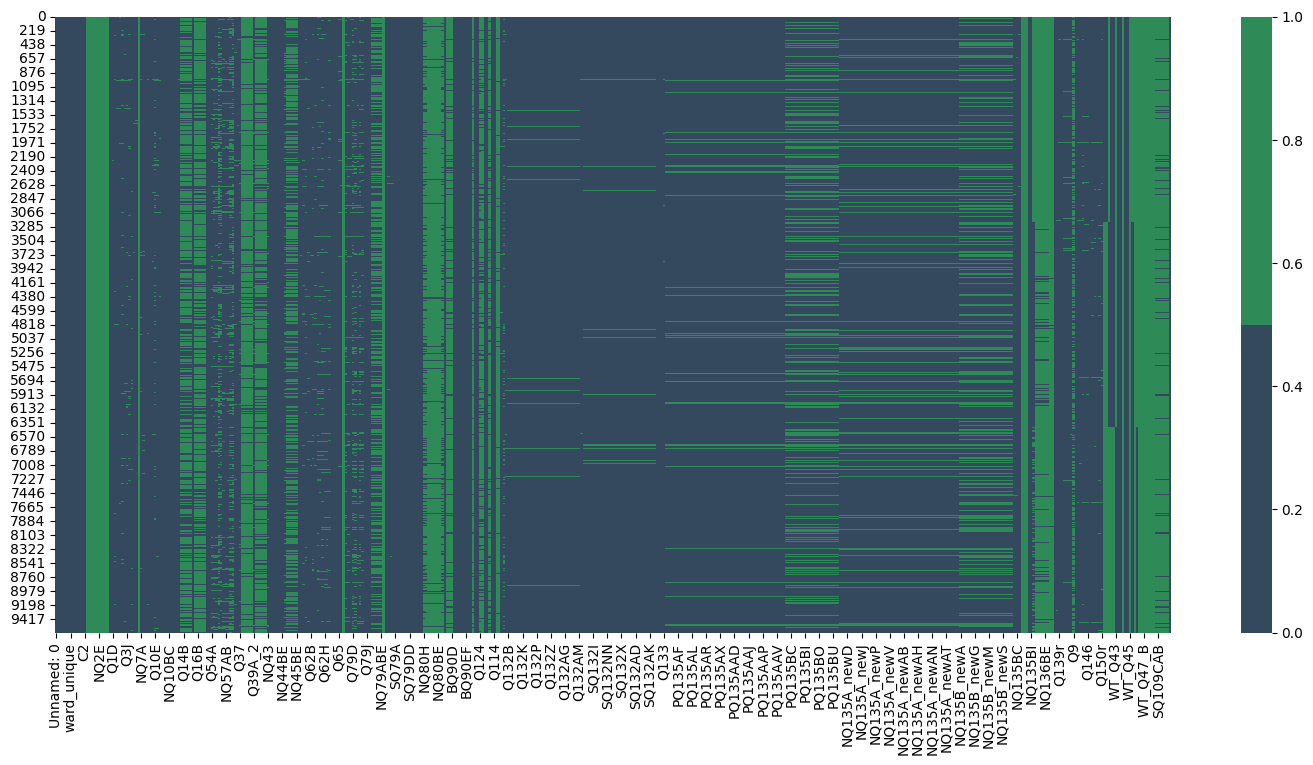

In [11]:

plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(data_15.isnull(), cmap=sns.color_palette(colours))

In [12]:
column_drop = ["BOROUGHNEIGHBOURHOOD",
    "Unnamed: 0",
    "interview_date",
    "MONTH",
    "FinancialYear",
    "ward",
    "SOA1",
    "SOA2",
    "quarter",
    "NQ1",
    "NQ2A",
    "NQ2B",
    "NQ2C",
    "NQ2D",
    "NQ2E",
    "NQ2F",
    "NQ2G",
    "NQ2H",
    "Q126DC",
    "Q106B"
]
data_15.drop(column_drop, axis='columns', inplace=True)

C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\3064193054.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15.drop(column_drop, axis='columns', inplace=True)


In [13]:
picked_columns = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "A120",
    "A121",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "Q10A", 
    "Q10B", 
    "Q10C", 
    "Q10D", 
    "Q10E", 
    "Q10F",
    #"Q119",
    #"Q114",
    "NQ119",
    "PQ119",
    "Q133",
    'NQ133',
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ146",
    "NQ147r", 
    "NQ155r",
    "Q131",
    "Q148",
    "Q3L",
    "NQ149r",
    "Q150r",
]

data_15_17_special = data_15_17[picked_columns]
data_15_special = data_15[picked_columns]
data_16_special = data_16[picked_columns]
data_17_special = data_17[picked_columns]


In [14]:
#New columns in 17-18 that were not here before
data_17_1.columns.difference(data_17.columns)

Index(['BOROU0', 'BOROU1', 'BOROUGHNEIGHBOURHOODCODED', 'WARD_0', 'WARD_1',
       'WT_Q49', 'WT_Q49_B', 'WT_Q49_E', 'WT_Q50', 'WT_Q50_B', 'WT_Q50_E',
       'WT_Q51', 'WT_Q51_B', 'WT_Q51_E', 'WT_Q52', 'WT_Q52_B', 'WT_Q52_E',
       'XQ106B', 'XQ119A', 'XQ119B', 'XQ122', 'XQ123', 'XQ192', 'XQ21A',
       'XQ21B', 'XQ21C', 'XQ21D', 'XQ21E', 'XQ3A', 'XQ3B', 'XQ57A', 'XQ57B',
       'XQ57C', 'XQ8', 'XQ81', 'XQ81A', 'XQ81B', 'XQ9A', 'XQ9B', 'ZNQ10A',
       'ZNQ10BA', 'ZNQ10BB', 'ZNQ10BC', 'ZNQ10BD', 'ZNQ10BE', 'ZNQ10BF',
       'ZNQ119', 'ZPQ119', 'ZQ10A', 'ZQ10B', 'ZQ10C', 'ZQ10D', 'ZQ10E',
       'ZQ10F', 'ZQ10H', 'ZQ110'],
      dtype='object')

In [15]:
# Old columns that were removed in the new 17-18 
data_17_special.columns.difference(data_17_1.columns)
'''
NQ119: Prior to this experience, was your overall opinion of the police...? *** weird classification - changed to XQ119A

PQ119: As a result of your contact with the police on this occasion, 
please tell me if your opinion is now better, worse or has not changed? *** - strange colour - changed to XQ119A

Q110: Including anything you've already mentioned, 
in the last 12 months have the police stopped you while you were in the car or on foot? -- can be removed

Q114: In the last 12 months have the police searched or arrested you? * -- can be replaced NQ80BD

Q119: Thinking about all the times you have had contact with the police, 
are you satisfied, dissatisfied or neither with the service the police provided? - REMOVED
 
Q126DA How important is it to you that you have a say in how your local area is policed?  ** -- can be removed

Q126DB How important is it to you that you have a say in how London as a whole is policed? *** -- can be removed
'''

"\nNQ119: Prior to this experience, was your overall opinion of the police...? *** weird classification - changed to XQ119A\n\nPQ119: As a result of your contact with the police on this occasion, \nplease tell me if your opinion is now better, worse or has not changed? *** - strange colour - changed to XQ119A\n\nQ110: Including anything you've already mentioned, \nin the last 12 months have the police stopped you while you were in the car or on foot? -- can be removed\n\nQ114: In the last 12 months have the police searched or arrested you? * -- can be replaced NQ80BD\n\nQ119: Thinking about all the times you have had contact with the police, \nare you satisfied, dissatisfied or neither with the service the police provided? - REMOVED\n \nQ126DA How important is it to you that you have a say in how your local area is policed?  ** -- can be removed\n\nQ126DB How important is it to you that you have a say in how London as a whole is policed? *** -- can be removed\n"

In [16]:
picked_columns_17_18 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "A121",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ147r",
    "NQ149r",
    "Q150r",
    #NEW QUESTIONS
   # "XQ106B", ### mayebe add it if it is mentioned in other surveys -> NOT ENOUGH 
   # "NQ146", ### add to 2015_17 it is only asked form 2017
   # "XQ122", ### it is not asked in 2015_17 in any way -> NOT ENOUGH
   # "XQ123", ### conncted with XQ122
     # "XQ21A", ### cool, but not asked in 2015_17 -> OK CAN BE ADDED BUT THERE MIGHT BE TO MUCH NaN
    # "XQ21C", ### we have crome data to cjeck that -> OK CAN BE ADDED BUT THERE MIGHT BE TO MUCH NaN left it 
   # "XQ57A", ### we don't have it in 2015_17 doesn't seem that relevant
   # "XQ57B", ### we don't have it in 2015_17 doesn't seem that relevant
   # "XQ57C", ### we don't have it in 2015_17 doesn't seem that relevant
   # "XQ8",  ### good, measures confidence check if it is in other years -> 
    "ZQ10A", ### can be added 2015_17
    "ZQ10B", ### can be added 2015_17
    "ZQ10C", ### can be added 2015_17
    "ZQ10D", ### can be added 2015_17
    "ZQ10E", ### can be added 2015_17
    "ZQ10F", ### can be added 2015_17
    "Q3L",
    "NQ146",
    #REPLACED QUESTIONS
    'NQ133',
    "XQ119A",
    "XQ119B"
]
data_17_18_special = data_17_18[picked_columns_17_18]


In [17]:
#New columns in 18-19 that were not here before
data_18_1.columns.difference(data_18.columns)

Index(['NQ135BK', 'NQ135BL', 'NQ135BM', 'NQ135BN', 'NQ46A', 'NQ46BA', 'NQ46BB',
       'NQ46BC', 'NQ46BD', 'NQ46BE', 'NQ47A', 'NQ47BA', 'NQ47BB', 'NQ47BC',
       'NQ47BD', 'NQ47BE', 'WT_Discrete', 'WT_Discrete_rebased', 'WT_Q53',
       'WT_Q53_B', 'WT_Q53_E', 'WT_Q54', 'WT_Q54_B', 'WT_Q54_E', 'WT_Q55',
       'WT_Q55_B', 'WT_Q55_E', 'WT_Q56', 'WT_Q56_B', 'WT_Q56_E', 'XBQ90A',
       'XQ57D', 'XQ59A', 'XQ59B', 'XQ59C', 'XQ59D', 'XQ82A', 'XQ82B', 'ZQ10I',
       'ZQ10J'],
      dtype='object')

In [18]:
# Old columns that were removed in the new 18-19 
# data_18_special.columns.difference(data_18_1.columns)

# NQ80BD: What was the nature of this contact? Stopped and searched -- removed
# XQ21C: Some communities and individuals in your local area are more likely to experience crime than others -- removed

In [19]:
picked_columns_18_19 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "A121",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
    #"XQ106B",
    #"NQ146",
    #"XQ122",
    #"XQ123",
    # "XQ21A",
    #"XQ57A",
    #"XQ57B",
    #"XQ57C",
    #"XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F",
    "Q3L",
    "NQ146",
    "NQ147r",
    'NQ133',
    #NEW QUESTIONS
   # "NQ46A", ### does not seem that relevant
   # "NQ46BA", ### anwsers the previous question
   #  "ZQ10I", ### does not seem relevant
   # "ZQ10J", ### does not seem relevant
   "XQ119A", # rename them
   "XQ119B" # reanme them so they match 2015_2017
    
]
data_18_19_special = data_18_19[picked_columns_18_19]


In [20]:
#New columns in 19-20 that were not here before
data_19_1.columns.difference(data_19.columns)


'''

NNQ135A_newA: What would you say are the top three things that the police 
should be dealing with across London? FIRST PRIORITY  #### nah too little response

NNQ135A_newB: What would you say are the top three things that the police 
should be dealing with across London?SECOND PRIORITY #### nah too little response

NNQ135A_newC: What would you say are the top 
three things that the police should be dealing with across London?THIRD PRIORITY #### nah too little response




NQ49B: To what extent do you feel sexual assault or sexual violence is a problem in this area? #### nah too little response

NQ49C: To what extent do you feel that domestic abuse or violence is a problem in this area? 
This includes emotional, psychological, financial or physical abuse between partners or family members #### nah too little response

NQ62D: To what extent do you agree with these statements about the police and crime more generally?  #### nah too little response
The police have the same sense of right and wrong as I do


SQ79ED: To what extent would you support or oppose the use of the following tactics in your area?...  #### nah too little response
Stop and Search – a power that means the police can search a person if 
they think they may be carrying something they shouldn't be, such as drugs or weapon

SQ79EC: To what extent would you support or oppose the use of the following tactics in your area?... #### nah too little response
Stop and Account – a power that means the police can stop a person to ask 
what they are doing if they think they may be involved in criminal activity.

XQ122B: How confident are you that the Metropolitan Police Service deal fairly with complaints made about them? #### nah too little response

XQ128A: Have you personally ever been stopped and searched in London? 
Please only think about any occasions where the police have physically searched you or your vehicle,  #### nah too little response
and not occasions where the police may have stopped you for other reasons.

XQ128B: When you were stopped and searched, would you say that the police... Were polite? #### nah too little response

XQ128C: When you were stopped and searched, would you say that the police... Treated you with respect? #### nah too little response
 
XQ128D: When you were stopped and searched, would you say that the police... Told you the reasons why you had been stopped? #### nah too little response
'''

"\n\nNNQ135A_newA: What would you say are the top three things that the police \nshould be dealing with across London? FIRST PRIORITY  #### nah too little response\n\nNNQ135A_newB: What would you say are the top three things that the police \nshould be dealing with across London?SECOND PRIORITY #### nah too little response\n\nNNQ135A_newC: What would you say are the top \nthree things that the police should be dealing with across London?THIRD PRIORITY #### nah too little response\n\n\n\n\nNQ49B: To what extent do you feel sexual assault or sexual violence is a problem in this area? #### nah too little response\n\nNQ49C: To what extent do you feel that domestic abuse or violence is a problem in this area? \nThis includes emotional, psychological, financial or physical abuse between partners or family members #### nah too little response\n\nNQ62D: To what extent do you agree with these statements about the police and crime more generally?  #### nah too little response\nThe police have th

In [21]:
#New columns in 19-20 that were not here before
# data_19_special.columns.difference(data_19_1.columns)
#XQ21A: Your local area is a safe place for women and girls -- removed
#XQ128A: Have you personally ever been stopped and searched in London? is readded

In [22]:
picked_columns_19_20 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "A121",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
   # "XQ106B",
   # "NQ146",
    # "XQ122",
    # "XQ123",
    # "XQ57A",
    # "XQ57B",
    # "XQ57C",
    # "XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F",
    # "NQ46A",
    # "NQ46BA",
    # "ZQ10I", NOT RELATED
    # "ZQ10J", NOT RELATED
    "Q3L",
    "NQ146",
    'XQ119B',
    'XQ119A', 
    'NQ147r',
    'NQ133',
    #NEW QUESTIONS
    # "NNQ135A_newA",
    # "NNQ135A_newB",
    # "NNQ135A_newC",
    # "NQ49B",
    # "NQ49C",
    # "NQ62D"
]

data_19_20_special = data_19_20[picked_columns_19_20]


In [23]:
data_20_1.columns.difference(data_20.columns)
'''

NQ135BDE: To what extent do you agree or disagree with the following statements: 
Media companies are organisations I can trust

NQ135BDB: To what extent do you agree or disagree with the following statements: 
Central Government is an organisation that I can trust

ReNQ147: Recoded NQ147 Ethnicity
ReQ136: Recoded Q136 Age
ReQ150: Recoded Q150 Sexual orientation
ReQ139: Recoded Q139 Empoyement status
ReQ139: Recoded XQ135 Gender

XQ128A2A: Thinking about people you know who have been stopped and searched, 
have you heard whether their experiences were positive or negative, or have their experiences been mixed?

XQ128E: Thinking about the last time you were stopped and searched by the police, would you say that they... 
Explained why they stopped and searched you?

'''

'\n\nNQ135BDE: To what extent do you agree or disagree with the following statements: \nMedia companies are organisations I can trust\n\nNQ135BDB: To what extent do you agree or disagree with the following statements: \nCentral Government is an organisation that I can trust\n\nReNQ147: Recoded NQ147 Ethnicity\nReQ136: Recoded Q136 Age\nReQ150: Recoded Q150 Sexual orientation\nReQ139: Recoded Q139 Empoyement status\nReQ139: Recoded XQ135 Gender\n\nXQ128A2A: Thinking about people you know who have been stopped and searched, \nhave you heard whether their experiences were positive or negative, or have their experiences been mixed?\n\nXQ128E: Thinking about the last time you were stopped and searched by the police, would you say that they... \nExplained why they stopped and searched you?\n\n'

In [24]:
# print(data_20_special.columns.difference(data_20_1.columns))

'''
NNQ135A_newA, NNQ135A_newB, NNQ135A_newC: What would you say are the top THREE things 
that the police should be dealing with ACROSS LONDON? - replaced by NNQ135A, NNQ135B, NNQ135C

NQ146: What is your highest level of qualification?girl -- removed
 – Good for highest level of education

NQ149r – NQ149: What is your religion, even if you are not currently practicing? 8 options *** -- removed

NQ155r – place of born binary UK and  NON uk

NQ21: If you are walking alone in this area and you see a police officer on foot, 
bicycle or horseback, does it make you feel more safe, less safe or does it make no difference? -- removed

NQ46A: To what extent do you think people using mopeds or bicycles to commit crimes are a problem in this area? 
By this we mean people committing thefts, assaults or robberies using a moped or bicycle as a means of escape. -- removed
NQ46BA: Is this based on...? Your personal experience -- removed

NQ49B: To what extent do you feel sexual assault or sexual violence is a problem in this area? +- party replaced by 
change with corona virus
NQ49C: To what extent do you feel that domestic abuse or violence is a problem in this area?
This includes emotional, psychological, financial, or physical abuse between partners or family members +- party replaced 
by change with corona virus

NQ57AA: How satisfied are you with the policing of the following London transport networks? Bus network -- removed
NQ57AB: How satisfied are you with the following London transport networks? Tube / London Underground Network -- removed
NQ57AC: How satisfied are you with the following London transport networks? Train Network -- removed
NQ57AD: How satisfied are you with the following London transport networks? Docklands Light Railway -- removed
NQ57AE: How satisfied are you with the following London transport networks? Tram Network -- removed

NQ62A: Respect for the police is an important value for people to have *** -- removed

"Q13" continuation questions, Q14B, Q14C, Q14D, Q14E: Is this based on...? -- removed

NQ155r – place of born binary UK and  NON uk -- removed

Q136r age 10 options ***
XQ135r *** gender
Q150r: Would you describe yourself in any of these ways? Sexuality - replaced with ReQ135, ReQ136, ReQ150

Q3H: Local people and authorities have control over the public space in this area *** -- removed

Q62D: They can be relied on to deal with minor crimes ***  -- removed
Q62E: They understand the issues that affect this community *** -- removed
Q62H: The police in this area are helpful *** -- removed
Q62TI: The police in this area are friendly and approachable *** -- removed
Q62TJ: The police in this area are easy to contact *** -- removed

Q65: On average, how often do YOU see the police PATROLLING ON FOOT OR BICYCLE IN THIS AREA? 
Remember I am talking about the area within 15 minutes' walk --- special encoding -- removed
Q66: Do you think this is...? -- removed

Q79A: And how well do you think the Metropolitan Police… Prevents terrorism? *** -- removed
Q79B: And how well do you think the Metropolitan Police… Responds to emergencies promptly? *** -- removed
Q79C: And how well do you think the Metropolitan Police… Provide a visible patrolling presence? *** -- removed
Q79D: And how well do you think the Metropolitan Police… Tackle gun crime? *** -- removed
Q79E: And how well do you think the Metropolitan Police… Support victims and witnesses? *** -- removed
Q79F: And how well do you think the Metropolitan Police… Police major events in London? *** -- removed
Q79G: And how well do you think the Metropolitan Police… Tackle drug dealing and drug use? ** -- removed
Q79H: And how well do you think the Metropolitan Police… Tackle dangerous driving? * -- removed
Q79I: Respond to hate crime? ***** -- removed
Q79J: Respond to violence against women and girls? ***	 -- removed

SQ79EC: To what extent would you support or oppose the use of the following tactics in your area?... 
Stop and Account – a power that means the police can stop a person to ask 
what they are doing if they think they may be involved in criminal activity. -- removed

SQ79ED: To what extent would you support or oppose the use of the following tactics in your area?... 
Stop and Search – a power that means the police can search a person if 
they think they may be carrying something they shouldn't be, such as drugs or weapon -- removed

XQ106B: When you contacted the police on this occasion, 
do you feel you were treated with respect by the police officers involved? -- removed

XQ122: Have you ever been dissatisfied with the way a Metropolitan Police officer behaved towards you 
or someone you know? -- removed
XQ123: Did this happen in the last five years? – resumes XQ122 -- removed

XQ57A: Unwanted attention of a non-contact and non-sexual nature for example shouts, 
insults, staring, name calling etc. -- removed
XQ57B: Unwanted attention of a non-contact but sexual nature for example wolf whistling, 
sexual comments, staring, exposure etc. -- removed
XQ57C: Unwanted body or physical contact of a sexual nature -- removed

XQ8? X8: How confident or not are you that the Criminal Justice System
is effective in bringing people who commit crimes to justice? -- removed

ZQ10A: How much of a problem are noisy neighbours or loud parties? -- removed
ZQ10B: How much of a problem are teenagers hanging around on the streets? – boomer question? -- removed
ZQ10C: How much of a problem are rubbish or litter lying around? -- removed
ZQ10D: How much of a problem are vandalism, graffiti and other deliberate damage to property or vehicles? -- removed
ZQ10E: How much of a problem are people using or dealing drugs?-- removed
ZQ10F: How much of a problem are people being drunk or rowdy in public places?-- removed
ZQ10I: How much of a problem are people who drive mopeds or ride bicycles in an anti-social or dangerous manner? 
Examples may include riding on pavements, speeding or noise. -- removed
ZQ10J: How much of a problem are people who drive cars or motorbikes in an anti-social or dangerous manner?
Examples may include speeding, ignoring traffic signals or aggressive driving. -- removed
'''

'\nNNQ135A_newA, NNQ135A_newB, NNQ135A_newC: What would you say are the top THREE things \nthat the police should be dealing with ACROSS LONDON? - replaced by NNQ135A, NNQ135B, NNQ135C\n\nNQ146: What is your highest level of qualification?girl -- removed\n – Good for highest level of education\n\nNQ149r – NQ149: What is your religion, even if you are not currently practicing? 8 options *** -- removed\n\nNQ155r – place of born binary UK and  NON uk\n\nNQ21: If you are walking alone in this area and you see a police officer on foot, \nbicycle or horseback, does it make you feel more safe, less safe or does it make no difference? -- removed\n\nNQ46A: To what extent do you think people using mopeds or bicycles to commit crimes are a problem in this area? \nBy this we mean people committing thefts, assaults or robberies using a moped or bicycle as a means of escape. -- removed\nNQ46BA: Is this based on...? Your personal experience -- removed\n\nNQ49B: To what extent do you feel sexual assau

In [25]:
picked_columns_20_21 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3J",
    "Q13",
    "Q15",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62F",
    "Q62TG",
    "NQ62B",
    "A120",
    "Q133",
    "NQ135BD",
    "Q131",
    "Q148",
    "NQ62D",
    "XQ122B",
    "XQ128C",
    "XQ128D",
    "XQ128A",
    #NEW QUESTIONS
    "NQ135BDE",
    "NQ135BDB",
    "XQ128A2A",
    "XQ128E",
    #REPLACED QUESTIONS
    "ReNQ147",
    "ReQ136",
    "ReQ150",
    "ReQ139",
]

data_20_1_special = data_20_1[picked_columns_20_21]
data_21_special = data_21[picked_columns_20_21]

## SPECIAL FOR 2015_17 REPLACE THE NAME OF THE COLUMNS:

 NQ119 -> XQ119A
 PQ119 -> XQ119B

 Q10A -> ZQ10A
 Q10B -> ZQ10B
 Q10C -> ZQ10C
 Q10D -> ZQ10D
 Q10E -> ZQ10E
 Q10F -> ZQ10F



In [26]:
# 15_17 - 17_18 SAME COLUMNS

data_15_17_special["XQ119A"] = data_15_17_special["NQ119"]
data_15_17_special["XQ119B"] = data_15_17_special["PQ119"]

data_15_17_special.drop("NQ119", axis=1, inplace=True)
data_15_17_special.drop("PQ119", axis=1, inplace=True)

data_15_17_special["ZQ10A"] = data_15_17_special["Q10A"]
data_15_17_special["ZQ10B"] = data_15_17_special["Q10B"]
data_15_17_special["ZQ10C"] = data_15_17_special["Q10C"]
data_15_17_special["ZQ10D"] = data_15_17_special["Q10D"]
data_15_17_special["ZQ10E"] = data_15_17_special["Q10E"]
data_15_17_special["ZQ10F"] = data_15_17_special["Q10F"]

data_15_17_special.drop("Q10A", axis=1, inplace=True)
data_15_17_special.drop("Q10B", axis=1, inplace=True)

data_15_17_special.drop("Q10C", axis=1, inplace=True)
data_15_17_special.drop("Q10D", axis=1, inplace=True)

data_15_17_special.drop("Q10E", axis=1, inplace=True)
data_15_17_special.drop("Q10F", axis=1, inplace=True)


print(set(data_15_17_special.columns) - set(data_17_18_special.columns))
print(set(data_17_18_special.columns) - set(data_15_17_special.columns))

set()
set()


C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2539832671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15_17_special["XQ119A"] = data_15_17_special["NQ119"]
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2539832671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15_17_special["XQ119B"] = data_15_17_special["PQ119"]
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\2539832671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [27]:
# picked_columns_19_20, picked_columns_18_19, picked_columns_17_18, picked_columns
print(set(picked_columns_17_18) - set(picked_columns_18_19))

print(set(picked_columns_18_19) - set(picked_columns_17_18))

print(set(picked_columns_18_19) - set(picked_columns_19_20))

print(set(picked_columns_19_20) - set(picked_columns_18_19))

set()
set()
set()
set()


In [28]:
# combining columns

combined_df = pd.concat([data_15_17_special, data_17_18_special, data_18_19_special, data_19_20_special], ignore_index=True)

In [29]:
data_15_17_special.shape, data_17_18_special.shape, data_18_19_special.shape, data_19_20_special.shape, combined_df

((25676, 69),
 (12808, 69),
 (12811, 69),
 (12367, 69),
         datetime                               Q1             Q3C  \
 0     2015-04-01   5 years but less than 10 years           Agree   
 1     2015-04-01                 30 years or more           Agree   
 2     2015-04-01   5 years but less than 10 years             NaN   
 3     2015-04-01    2 years but less than 3 years           Agree   
 4     2015-05-01  12 months but less than 2 years           Agree   
 ...          ...                              ...             ...   
 63657 2020-03-01                 30 years or more           Agree   
 63658 2020-03-01                 30 years or more  Strongly agree   
 63659 2020-03-01  10 years but less than 20 years           Agree   
 63660 2020-03-01   5 years but less than 10 years           Agree   
 63661 2020-03-01                 30 years or more        Disagree   
 
                   Q3H             Q3J                 Q13  \
 0               Agree           Agree  

In [30]:
# just checking if the anwseres changed over the years, thet did not, thankfully...
ball = dict()
for column in combined_df.columns:
    ball[column] = set(combined_df[column])

ball

{'datetime': {Timestamp('2015-04-01 00:00:00'),
  Timestamp('2015-05-01 00:00:00'),
  Timestamp('2015-06-01 00:00:00'),
  Timestamp('2015-07-01 00:00:00'),
  Timestamp('2015-08-01 00:00:00'),
  Timestamp('2015-09-01 00:00:00'),
  Timestamp('2015-10-01 00:00:00'),
  Timestamp('2015-11-01 00:00:00'),
  Timestamp('2015-12-01 00:00:00'),
  Timestamp('2016-01-01 00:00:00'),
  Timestamp('2016-02-01 00:00:00'),
  Timestamp('2016-03-01 00:00:00'),
  Timestamp('2016-04-01 00:00:00'),
  Timestamp('2016-05-01 00:00:00'),
  Timestamp('2016-06-01 00:00:00'),
  Timestamp('2016-07-01 00:00:00'),
  Timestamp('2016-08-01 00:00:00'),
  Timestamp('2016-09-01 00:00:00'),
  Timestamp('2016-10-01 00:00:00'),
  Timestamp('2016-11-01 00:00:00'),
  Timestamp('2016-12-01 00:00:00'),
  Timestamp('2017-01-01 00:00:00'),
  Timestamp('2017-04-01 00:00:00'),
  Timestamp('2017-05-01 00:00:00'),
  Timestamp('2017-06-01 00:00:00'),
  Timestamp('2017-07-01 00:00:00'),
  Timestamp('2017-08-01 00:00:00'),
  Timestamp('201

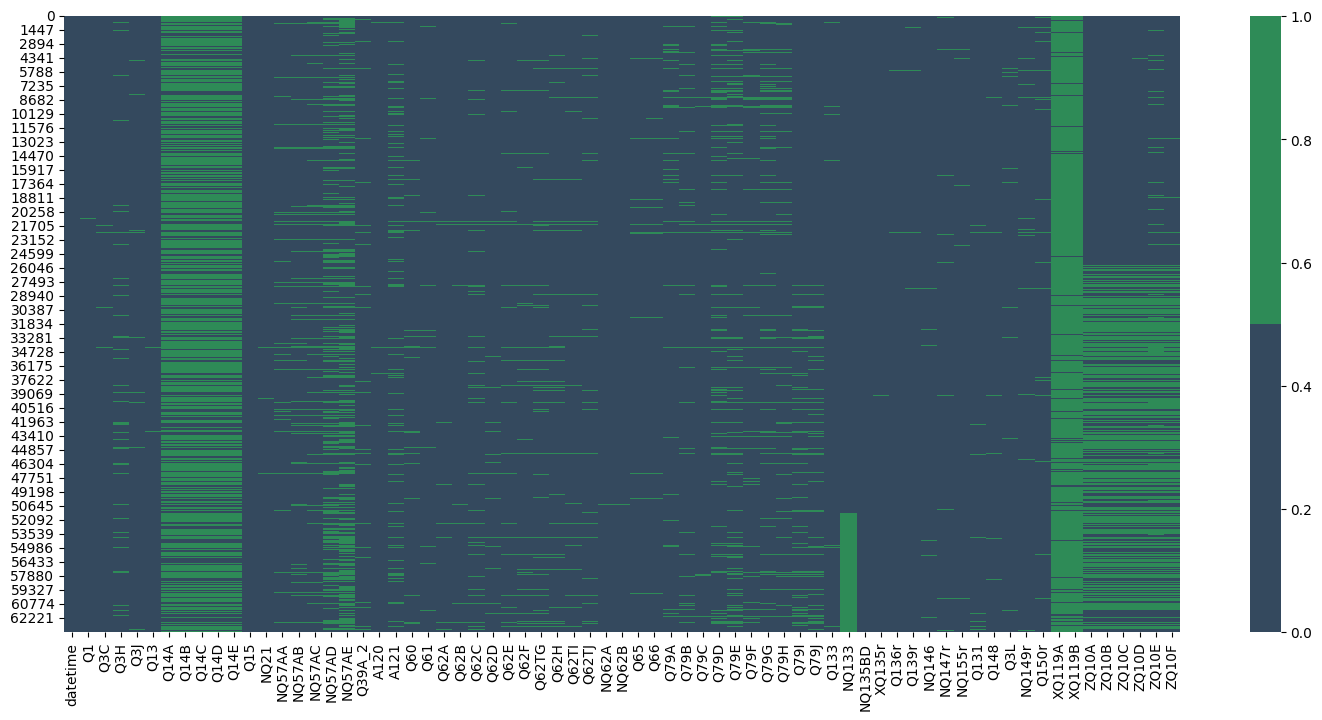

In [31]:

plot_NAN(combined_df)


In [32]:

### strange in 2017 there are 1070 rows of only questions from 2017
data_15_special.shape, data_16_special.shape, data_17_special.shape
months_2017 = set()
for date in data_15_17["MONTH"]:
    month = date.split()[1][1:]
    year = date.split()[2][:-1]
    if year == "2017":
        months_2017.add(month)


months_2017, data_15_special.shape, data_16_special.shape, data_17_special.shape

({'Jan'}, (9625, 69), (14981, 69), (1070, 69))

## GETTING THE DATA 

In [33]:
Encoded_df = combined_df.copy()

# Encoding values - ordinal

In [34]:
### function for encoding ordinal and ordinal "like" data

def ordinal_encoder(data: pd.DataFrame, category: list[str], column: str, missing: int):
    encoder = OrdinalEncoder(categories=category, handle_unknown='use_encoded_value', unknown_value=missing)
    encoder.fit(data[[column]])
    data[column] = encoder.transform(data[[column]])


### Q1 living in london 

    1	Less than 12 months
	2	12 months but less than 2 years
	3	2 years but less than 3 years
	4	3 years but less than 5 years
	5	5 years but less than 10 years
	6	10 years but less than 20 years
	7	20 years but less than 30 years
	8	30 years or more
    97	Don't know
	98	Refused
	99	Not Asked

In [35]:

cat_Q1 = [['Less than 12 months', '12 months but less than 2 years', '2 years but less than 3 years',
                 '3 years but less than 5 years', '5 years but less than 10 years', '10 years but less than 20 years',
                 '20 years but less than 30 years', '30 years or more']]

ordinal_encoder(Encoded_df, cat_Q1, "Q1", -1)

set(Encoded_df["Q1"])

{-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

## Liker questions Q3C, Q3H, Q3J 
    1	Strongly agree
	2	Agree
	3	Neither agree nor disagree
	4	Disagree
	5	Strongly disagree
    97	Don't know
	98	Refused
	99	Not Asked

In [36]:

# list of columns being transformed
Q3 = ["Q3C", "Q3H", "Q3J"]
cat_Q3 = [["Strongly disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly agree"]]

for name in Q3:
    ordinal_encoder(Encoded_df, cat_Q3, name, -1)



In [37]:
set(Encoded_df["Q3C"]), set(Encoded_df["Q3H"]), set(Encoded_df["Q3J"])

({-1.0, 0.0, 1.0, 2.0, 3.0, 4.0},
 {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0},
 {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0})

## Q3L: To what extent do you agree or disagree that this local area is a place where people from different backgrounds get on well together?

	1	Definitely agree
	2	Tend to agree
	3	Tend to disagree
	4	Definitely disagree
	97	Don't know
	98	Refused
	99	Not Asked

In [38]:
cat_Q3L= [["Definitely disagree", "Tend to disagree", "Tend to agree", "Definitely agree"]]

ordinal_encoder(Encoded_df, cat_Q3L, "Q3L", -1)


In [39]:
set(Encoded_df["Q3L"])

{-1.0, 0.0, 1.0, 2.0, 3.0}

# Likert question Q60, Q61

    1	Excellent
	2	Good
	3	Fair
	4	Poor
	5	Very poor
    97	Don't know
	98	Refused
	99	Not Asked

In [40]:
Q60_61 = ["Q60", "Q61"]
cat_Q60_61 = [["Very poor", "Poor", "Fair", "Good", "Excellent"]]

for name in Q60_61:
    ordinal_encoder(Encoded_df, cat_Q60_61, name, -1)

In [41]:
set(Encoded_df["Q60"]), set(Encoded_df["Q61"])

({-1.0, 0.0, 1.0, 2.0, 3.0, 4.0}, {-1.0, 0.0, 1.0, 2.0, 3.0, 4.0})

# Linkert question Q62A, Q62B, Q62C, Q62D, Q62E, Q62F, Q62TG, Q62H, Q62TI, Q62TJ, NQ62B, A120, NQ135BD

    1	Strongly agree
	2	Tend to agree
	3	Neither agree nor disagree
	4	Tend to disagree
	5	Strongly disagree
    97	Don't know
	98	Refused
	99	Not Asked

In [42]:
Q62A_NQ135BD = ["Q62A", "Q62B", "Q62C", "Q62D", "Q62E", "Q62F", "Q62TG", "Q62H", "Q62TI", "Q62TJ", "NQ62B", "A120", "NQ135BD", "NQ62A"]
cat_Q62A_NQ135BD= [["Strongly disagree", "Tend to disagree", "Neither agree nor disagree", "Tend to agree", "Strongly agree"]]

for name in Q62A_NQ135BD:
    ordinal_encoder(Encoded_df, cat_Q62A_NQ135BD, name, -1)


## A121: How confident are you that the Police in this area use their Stop and Search powers fairly?

    1	Very confident
	2	Fairly confident
	3	Not very confident
	4	Not at all confident
	97	Don't know
	98	Refused
	99	Not Asked

In [43]:
cat_Q1 = [['Not at all confident', 'Not very confident', 'Fairly confident', 'Very confident']]

ordinal_encoder(Encoded_df, cat_Q1, "A121", -1)

set(Encoded_df["Q1"])

{-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}

## Likert - worried scale Q13, Q15

    1	Very worried
	2	Fairly worried
	3	Not very worried
	4	Not at all worried
    97	Don't know
	98	Refused
	99	Not Asked

In [44]:
Q13_15 = ["Q13", "Q15"]
cat_Q13_15= [["Very worried", "Fairly worried", "Not very worried", "Not at all worried"]]

for name in Q13_15:
    ordinal_encoder(Encoded_df, cat_Q13_15, name, -1)

## PATROL FREQ Q65

    1	At least daily
	2	At least weekly
	3	At least fortnightly
	4	At least monthly
	5	Less often
	6	Never
    97	Don't know
	98	Refused
	99	Not Asked 

In [45]:

cat_Q65= [["Never", "Less often", "At least monthly", "At least fortnightly", "At least weekly", "At least daily"]]

ordinal_encoder(Encoded_df, cat_Q65, "Q65", -1)

## Problems in a neighbourhood: noisy neiqhbours, teenagers on street, rubish, vandalism, dealing with drugs, alcohol (Z)Q10A, (Z)Q10B, (Z)Q10C, (Z)Q10D, (Z)Q10E, (Z)Q10F
## "Z" comes from the change in the name between surveys

	1	Very big problem
	2	Fairly big problem
	3	Not a very big problem
	4	Not a problem at all
	97	Don't know
	98	Refused
	99	Not Asked

In [46]:
ZQ10 = ['ZQ10A', 'ZQ10B', 'ZQ10C','ZQ10D','ZQ10E','ZQ10F' ]

cat_ZQ10 = [["Very big problem", "Fairly big problem", "Not a very big problem", "Not a problem at all"]]

for name in ZQ10:
    ordinal_encoder(Encoded_df, cat_ZQ10, name, -1)

## NQ21 HOW SAFE

    1	More safe
	2	Less safe
	3	It makes no difference
	97	Don't know
	98	Refused
	99	Not Asked

In [47]:

cat_NQ21= [["Less safe", "It makes no difference", "More safe"]]

ordinal_encoder(Encoded_df, cat_NQ21, "NQ21", -1)

In [48]:
set(Encoded_df["NQ21"])

{-1.0, 0.0, 1.0, 2.0}

# SATISFACTION WITH POLICE SURVELIENCE, NQ57AA, NQ57AB, NQ57AC, NQ57AD, NQ57AE 

    1	Completely satisfied
	2	Very satisfied
	3	Fairly satisfied
	4	Neither satisfied nor dissatisfied
	5	Fairly dissatisfied
	6	Very dissatisfied
	7	Completely dissatisfied
    97	Don't know
	98	Refused
	99	Not Asked

In [49]:
NQ57AA_Q119 = ["NQ57AA", "NQ57AB", "NQ57AC", "NQ57AD", "NQ57AE"]

cat_NQ57AA_Q119 = [["Completely dissatisfied", "Very dissatisfied", "Fairly dissatisfied", "Neither satisfied nor dissatisfied", 
                    "Fairly satisfied", "Very satisfied", "Completely satisfied"]]

for name in NQ57AA_Q119:
    ordinal_encoder(Encoded_df, cat_NQ57AA_Q119, name, -1)

# KNIFE CIRME Q39A_2

    1	Major problem
	2	Minor problem
	3	Not a problem at all
    97	Don't know
	98	Refused
	99	Not Asked

In [50]:
cat_Q39A_2 = [["Major problem", "Minor problem", "Not a problem at all"]]

ordinal_encoder(Encoded_df, cat_Q39A_2, "Q39A_2", -1)

set(Encoded_df["Q39A_2"])

{-1.0, 0.0, 1.0, 2.0}

## POLICE PREVENTS PROBLEMS... SCALE 1 - 7 (1 BAD JOB, 7 GREAT JOB) Q79A, Q79B, Q79C, Q79D, Q79E, Q79F Q79G, Q79H, Q79I, Q79J

    1	1 Not at all well
	2	2
	3	3
	4	4
	5	5
	6	6
	7	7 Very well


In [51]:
Q79A_J = ["Q79A", "Q79B", "Q79C", "Q79D", "Q79E", "Q79F", "Q79G", "Q79H", "Q79I", "Q79J"]

cat_Q79A_J = [["1 Not at all well", "2", "3", "4", "5", "6", "7 Very well"]]

for name in Q79A_J:
    ordinal_encoder(Encoded_df, cat_Q79A_J, name, -1)


## BIANRY OPTION IF A PERSON WS SEARCHED  Q148	AND IF A PERSON WAS WELL INFORMED ABOUT POLICE GOALS NQ133
    1	Yes
	2	No
    97	Don't know
	98	Refused
	99	Not Asked

In [52]:
Q114_148 = ["Q148", "NQ133"]

cat_Q114_148 = [["No", "Yes"]]

for name in Q114_148:
    ordinal_encoder(Encoded_df, cat_Q114_148, name, -1)

## WHAT WAS THE OPINION BEFORE BEING SEARCHED XQ119A, 

    1	Generally high
	2	Generally low
	3	Mixed
	4	(spontaneous) No opinion
    97	Don't know
	98	Refused
	99	Not Asked

In [53]:


cat_XQ119A= [["Generally low", "Mixed", "Generally high"]]

ordinal_encoder(Encoded_df, cat_XQ119A, "XQ119A", -1)

## WHAT WAS THE OPINION AFTER BEING SEARCHED  PQ119

    1  Unchanged
    2  Better opinion
    3  Worse opinion
    97 Don't know
    98 Refused
    99 Not Asked


In [54]:

cat_XQ119B= [['Worse opinion', 'Unchanged', 'Better opinion']]

ordinal_encoder(Encoded_df, cat_XQ119B, "XQ119B", -1)

## HOW WELL INFORMED Q131, Q133

    1	Very well informed
	2	Fairly well informed
	3	Not at all informed
    97	Don't know
	98	Refused
	99	Not Asked

In [55]:
Q131_133 = ["Q131", "Q133"]
cat_Q131_133 = [["Not at all informed", "Fairly well informed", "Very well informed"]]

for name in Q131_133:
    ordinal_encoder(Encoded_df, cat_Q131_133, name, -1)

    

In [56]:
set(Encoded_df["Q133"])

{-1.0, 0.0, 1.0, 2.0}

## AGE Q136r 

    1	16-17
	2	18-21
	3	22-24
	4	25-34
	5	35-44
	6	45-54
	7	55-64
	8	65-74
	9	75-84
	10	85+
    97	Don't know
	98	Refused
	99	Not Asked

In [57]:

cat_Q136r = [["16-17", "18-21", "22-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]]

ordinal_encoder(Encoded_df, cat_Q136r, "Q136r", -1)

In [58]:
Encoded_df["Q136r"].unique()

array([ 4.,  3., -1.,  6.,  5.])

## NQ133  Do you know what your local policing team priorities are?

    1	Yes
	2	No
    97	Don't know
	98	Refused
	99	Not Asked

In [59]:
data_15_17["Q119"].unique()

array([nan, 'Very satisfied', 'Completely satisfied',
       'Completely dissatisfied', 'Fairly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Fairly satisfied',
       'Very dissatisfied'], dtype=object)

# Encoding values - nominal 

In [60]:
### funcction for one-hot encoding


def one_hot_encoder(data: pd.DataFrame, column: str, dummy_na: bool, drop_first: bool):
    df_one_hot = pd.get_dummies(data[column], prefix=column, dummy_na=dummy_na, drop_first=drop_first)
    data = pd.concat([data, df_one_hot], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data


## ONE HOT ENCODING Q14
    1	Your personal experience
	2	The experience of someone you know
	3	What you have seen or heard in the media
	4	What you have seen in the area
	5	Other
	6	General feeling
	7	Groups of youths
	8	Threatening behaviour
	9	Have children/grandchildren
	10	Through work
	11	General concern about crime in area
	12	What you hear about in the area
	13	Worried more now due to deteriorating physical condition
    95	Not answered
	97	Don't know
	98	Refused
	99	Not asked

In [61]:
# for i in ['Q14A', 'Q14B', 'Q14C', 'Q14D', 'Q14E']:
#     print(Encoded_df[i].unique())


def encdoeQ14(response):
    if pd.notna(response) or response != "-":
        return False
    else:
        return True

for column in ['Q14A', 'Q14B', 'Q14C', 'Q14D', 'Q14E']:
    Encoded_df[column] = Encoded_df[column].apply(encdoeQ14)


    

In [62]:
Encoded_df.head()

,datetime,Q1,Q3C,Q3H,Q3J,Q13,Q14A,Q14B,Q14C,Q14D,...,NQ149r,Q150r,XQ119A,XQ119B,ZQ10A,ZQ10B,ZQ10C,ZQ10D,ZQ10E,ZQ10F
0,2015-04-01,4.0,3.0,3.0,3.0,2.0,False,False,False,False,...,Christian,Heterosexual,-1.0,-1.0,3.0,3.0,3.0,3.0,3.0,2.0
1,2015-04-01,7.0,3.0,3.0,3.0,1.0,False,False,False,False,...,Other religion,Heterosexual,-1.0,-1.0,2.0,3.0,3.0,3.0,3.0,1.0
2,2015-04-01,4.0,-1.0,-1.0,3.0,3.0,False,False,False,False,...,No religion,NaN,-1.0,-1.0,2.0,3.0,3.0,3.0,-1.0,1.0
3,2015-04-01,2.0,3.0,3.0,3.0,3.0,False,False,False,False,...,No religion,Non-Heterosexual,-1.0,-1.0,1.0,3.0,1.0,1.0,0.0,1.0
4,2015-05-01,1.0,3.0,3.0,3.0,2.0,False,False,False,False,...,No religion,Heterosexual,-1.0,-1.0,3.0,3.0,3.0,2.0,3.0,2.0


In [63]:
def get_columns_with_nan(data: pd.DataFrame) -> pd.DataFrame:
    # Identify columns with NaN values
    columns_with_nan = data.columns[data.isna().any()].tolist()
    
    # Extract columns with NaN values into a new DataFrame
    
    return columns_with_nan

get_columns_with_nan(Encoded_df)

['Q66', 'XQ135r', 'Q139r', 'NQ146', 'NQ147r', 'NQ155r', 'NQ149r', 'Q150r']

## GENDER XQ135r 

    1	1 - Male
	2	2 - Female
	3	3 - Transgender
	4	4 - Intersex
    97	Don't know
	98	Refused
	99	Not Asked

In [64]:
nominal_encoding = ["XQ135r", "Q139r", "NQ149r", "NQ147r", "Q66", "Q150r", "NQ155r", "NQ146"]
for col in nominal_encoding:
    Encoded_df = one_hot_encoder(Encoded_df, col, True, True)

## OCUUPATION Q139r 

    1	Full time (30+ hours per/week)
	2	Part time (8-29 hours per/week)
	3	Part time (less than 8 hours per/week)
	4	Not working
	5	House person
	6	Retired
	7	Registered unemployed
	8	Unemployed but not registered
	9	Student/full time education
	10	Other
    97	Don't know
	98	Refused
	99	Not Asked

## religion NQ149r 

    1	Christian (including Church of England, Catholic, Protestant and all other Christian denominations)
	2	Muslim
	3	Sikh
	4	Hindu
	5	Jewish
	6	Buddhist
	7	Other
	8	No religion/atheist/agnostic

## race NQ147r   -> ['White British', 'Asian', 'White Other', 'Black', 'Other', nan, 'Mixed']

    1	English
	2	Akan (Ashanti)
	3	Arabic
	4	Bengali and Sylheti
	5	Cantonese
	6	English-based Creoles
	7	French
	8	German
	9	Greek
	10	Gujarati
	11	Hindi/Urdu
	12	Panjabi
	13	Polish
	14	Portuguese
	15	Somali
	16	Spanish
	17	Turkish
	18	Yoruba (Nigeria)
	90	Other
    97	Don't know
	98	Refused
	99	Not Asked

## WHAT PEOPLE THINK REGARDING PATROL FREQ Q66 

    1	Not often enough
	2	About right
	3	Too often
    97	Don't know
	98	Refused
	99	Not Asked

# sexuality Q150r

    1	Heterosexual(orientation towards people of the opposite sex)
	2	Gay/lesbian (orientation towards people of the same sex)
	3	Bisexual (orientation towards people of the same and opposite sex)
	4	None of these
    97	Don't know
	98	Refused
	99	Not Asked

In [65]:
Encoded_df.loc[:, Encoded_df.columns != 'datetime'] = Encoded_df.loc[:, Encoded_df.columns != 'datetime'].astype(int)

Encoded_df.head()


C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\3066493900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  Encoded_df.loc[:, Encoded_df.columns != 'datetime'] = Encoded_df.loc[:, Encoded_df.columns != 'datetime'].astype(int)
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\3066493900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  Encoded_df.loc[:, Encoded_df.columns != 'datetime'] = Encoded_df.loc[:, Encoded_df.columns != 'datetime'].astype(int)
C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_34192\3066493900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will rais

,datetime,Q1,Q3C,Q3H,Q3J,Q13,Q14A,Q14B,Q14C,Q14D,...,NQ146_Not asked,NQ146_O-levels/CSE/GCSEs,"NQ146_ONC, OND or City and Guilds",NQ146_Other,NQ146_Other - please specify,NQ146_Post-graduate degree or qualification,NQ146_Refused,NQ146_Trade apprenticeship,NQ146_University Degree (Bachelor degree),NQ146_nan
0,2015-04-01,4.0,3.0,3.0,3.0,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2015-04-01,7.0,3.0,3.0,3.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2015-04-01,4.0,-1.0,-1.0,3.0,3.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2015-04-01,2.0,3.0,3.0,3.0,3.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2015-05-01,1.0,3.0,3.0,3.0,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


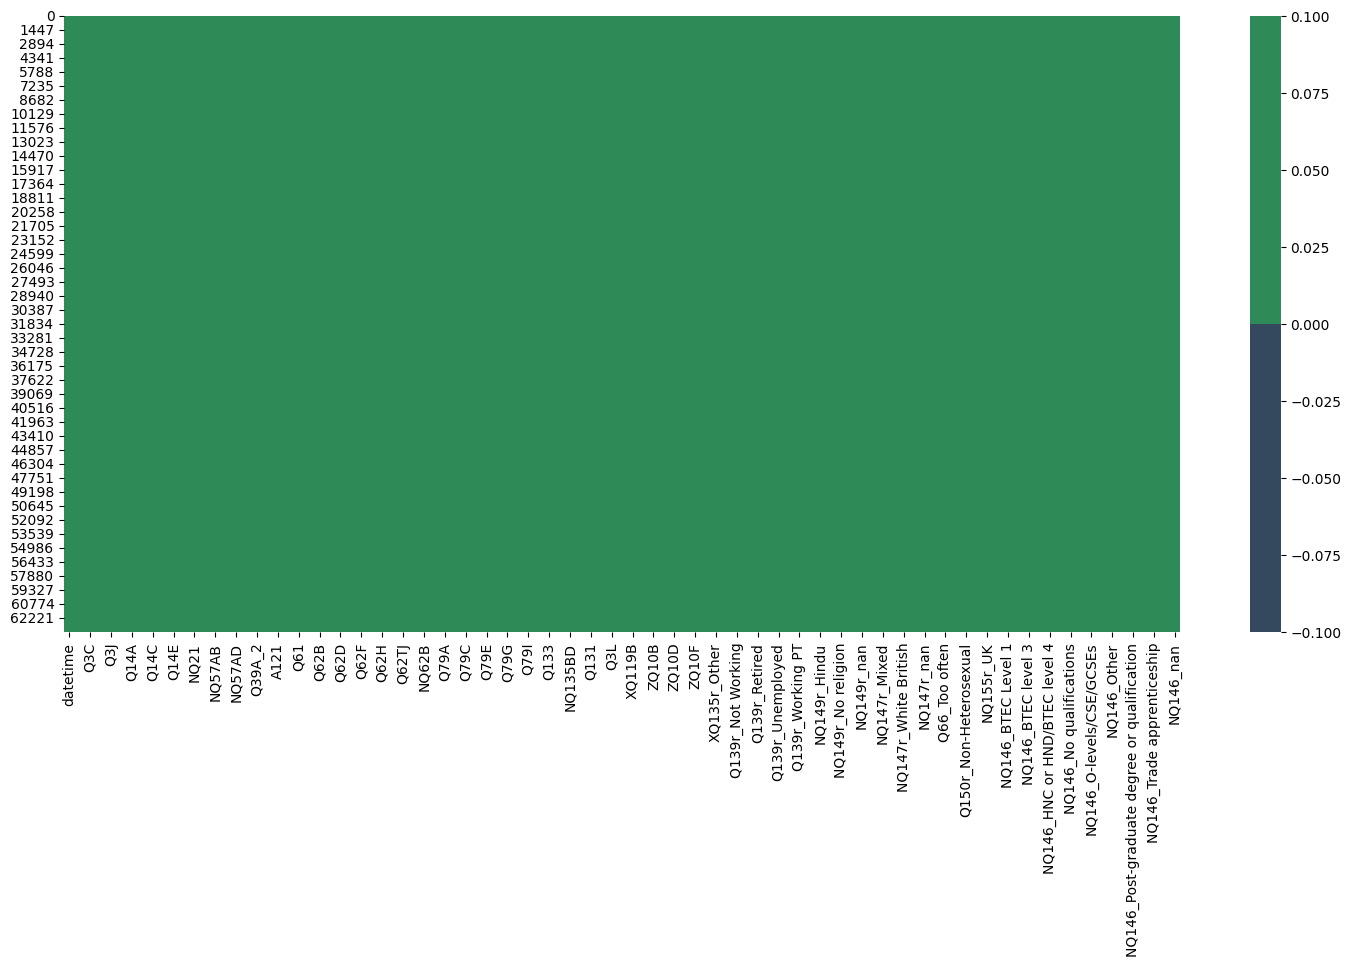

In [66]:

plot_NAN(Encoded_df)


In [68]:
Encoded_df.columns[Encoded_df.isnull().any()].tolist() # no nans, imean there are misssing vlaues but they are encoded

[]

In [122]:
Encoded_df.to_csv('PAS_data.csv', index=False)

# Special data for main model -> only trust included 

In [67]:
selectecColumns = ["datetime", "NQ135BD"]

data_15_17_trust = data_15_17[selectecColumns]
data_17_18_trust = data_17_18[selectecColumns]
data_18_19_trust = data_18_19[selectecColumns]
data_19_20_trust = data_19_20[selectecColumns]
data_20_21_trust = data_20_21[selectecColumns]

frames = [data_15_17_trust, data_17_18_trust, data_18_19_trust, data_19_20_trust, data_20_21_trust] 

trustData = pd.concat(frames)

# quick conversion to numbers for trust

NQ135BD = [["Strongly disagree", "Tend to disagree", "Neither agree nor disagree", "Tend to agree", "Strongly agree"]]

ordinal_encoder(trustData, NQ135BD, "NQ135BD", -1)

trustData['datetime'] = trustData['datetime'].dt.to_period('M')

trustData.head()

,datetime,NQ135BD
0,2015-04,3.0
1,2015-04,4.0
2,2015-04,4.0
3,2015-04,4.0
4,2015-05,4.0


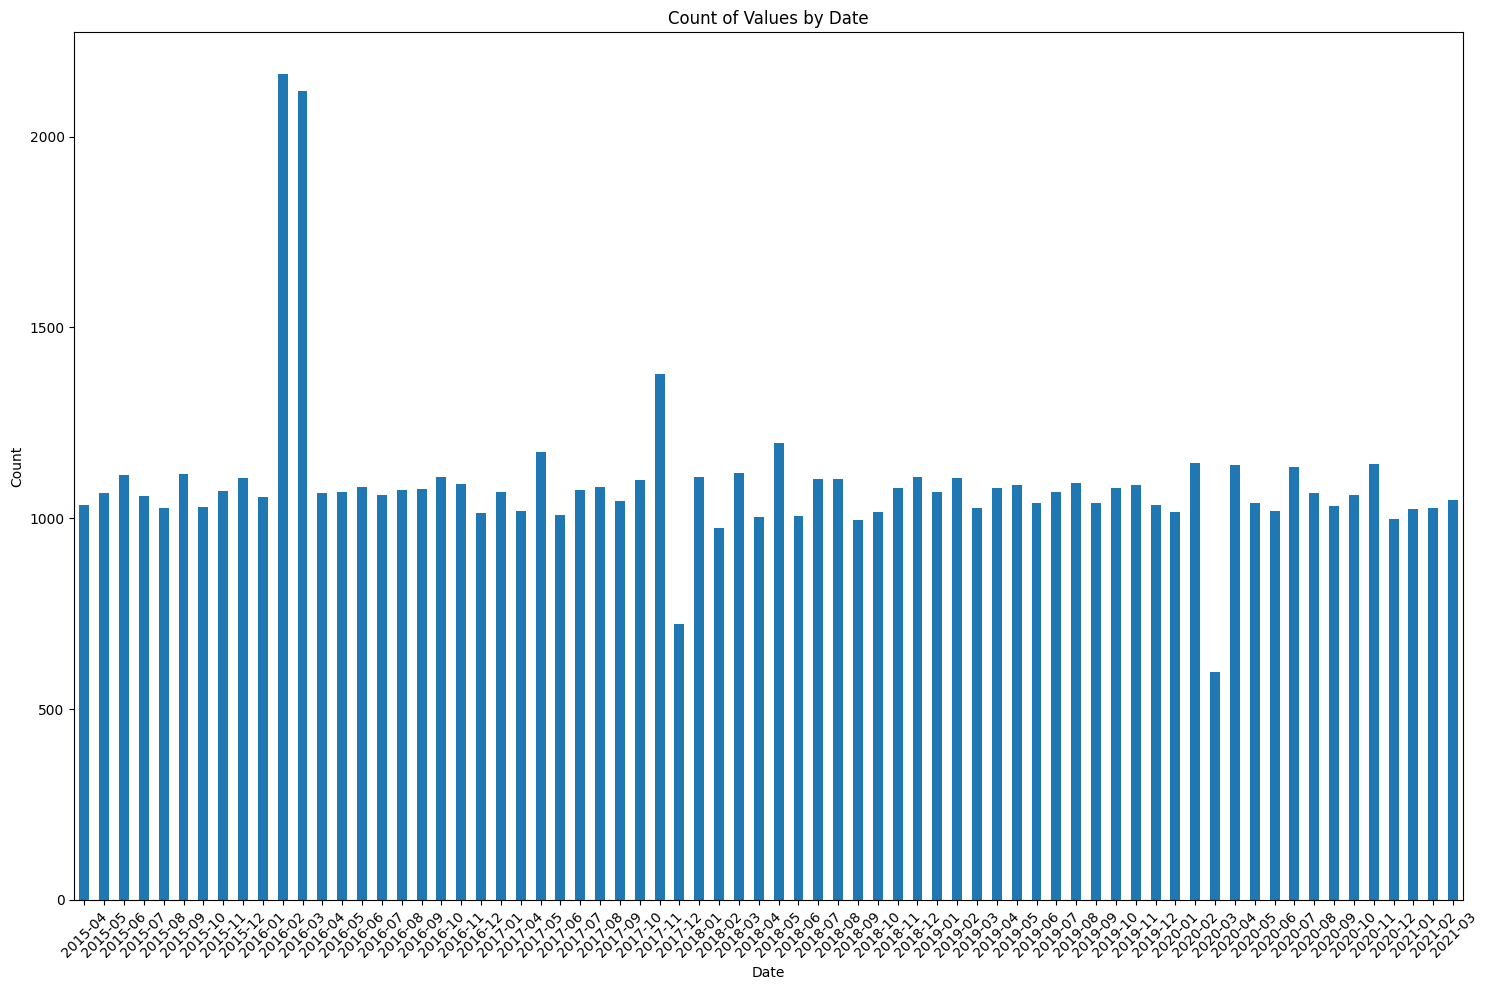

In [178]:

grouped_counts = trustData.groupby(["datetime"]).count()

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust figure size for better readability
grouped_counts.plot(kind='bar', ax=ax, legend=False)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Values by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Unfortunatelly, this approach does not work, instead proportion will be used 

In [204]:
# we get count sfor each repsonse type per month

pd.options.display.max_rows = 50


grouped = trustData.groupby(["datetime"])["NQ135BD"].value_counts()



result_dict = {}
for (date, value), count in grouped.items():
    if date not in result_dict:
        result_dict[date] = {}
    if value == -1: 
        pass
    else:
        result_dict[date][value] = count

print(result_dict)

{Period('2015-04', 'M'): {3.0: 511, 4.0: 353, 2.0: 99, 1.0: 46, 0.0: 20}, Period('2015-05', 'M'): {3.0: 523, 4.0: 388, 2.0: 96, 1.0: 37, 0.0: 14}, Period('2015-06', 'M'): {3.0: 577, 4.0: 377, 2.0: 95, 1.0: 48, 0.0: 15}, Period('2015-07', 'M'): {3.0: 527, 4.0: 385, 2.0: 97, 1.0: 30, 0.0: 17}, Period('2015-08', 'M'): {3.0: 523, 4.0: 361, 2.0: 85, 1.0: 31, 0.0: 26}, Period('2015-09', 'M'): {3.0: 517, 4.0: 429, 2.0: 108, 1.0: 31, 0.0: 26}, Period('2015-10', 'M'): {3.0: 455, 4.0: 400, 2.0: 92, 1.0: 46, 0.0: 31}, Period('2015-11', 'M'): {3.0: 523, 4.0: 404, 2.0: 81, 1.0: 39, 0.0: 19}, Period('2015-12', 'M'): {3.0: 568, 4.0: 414, 2.0: 84, 1.0: 23, 0.0: 12}, Period('2016-01', 'M'): {3.0: 589, 4.0: 348, 2.0: 71, 1.0: 36, 0.0: 11}, Period('2016-02', 'M'): {3.0: 1115, 4.0: 819, 2.0: 144, 1.0: 52, 0.0: 28}, Period('2016-03', 'M'): {3.0: 1084, 4.0: 778, 2.0: 171, 1.0: 46, 0.0: 34}, Period('2016-04', 'M'): {3.0: 545, 4.0: 415, 2.0: 72, 1.0: 22, 0.0: 12}, Period('2016-05', 'M'): {3.0: 525, 4.0: 414, 

In [202]:
# period_key = pd.Period('2015-04', freq='M')

### computes proporrion for PAS trust
def ProportionComputation1(inner: dict):
    scale = {0.0:0, 1.0:0.25, 2.0:0.5, 3.0:0.75, 4.0:1}
    total = 0
    number = 0
    for label in sorted(inner.keys())[1:]:
        number += inner[label]
        total += inner[label] * scale[label]

    return np.round(total/number, 2)

### computes proporrion for PAS trust
def ProportionComputation2(inner: dict):
    number = 0
    total = inner[3] + inner[4]
    for label in sorted(inner.keys())[1:]:
        number += inner[label] 

    return np.round(total/number, 2)

    
def PASPropportionDataFrame(data: dict):
    columnDate = []
    columnProportion = []
    for key, value in data.items():
        columnDate.append(key)
        columnProportion.append(ProportionComputation2(value))
    layout = {"Data":columnDate, "Proportion":columnProportion}
    return pd.DataFrame.from_dict(layout)

dataPasModel = PASPropportionDataFrame(result_dict)


In [205]:
# will have to see what works the best:  either method 1 or 2 -> right now we choose the second option

dataPasModel 


,Data,Proportion
0,2015-04,0.86
1,2015-05,0.87
2,2015-06,0.87
3,2015-07,0.88
4,2015-08,0.88
...,...,...
65,2020-11,0.84
66,2020-12,0.83
67,2021-01,0.84
68,2021-02,0.82
